In [90]:
import tensorflow as tf
from sklearn.pipeline import Pipeline
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense
import pickle as pkl
import numpy

In [91]:
data_path = 'dataframe.pkl'
data_pipeline_path = 'GradientBoostingRegressor.pkl'

with open(data_path , 'rb') as file:
    data = pkl.load(file)

with open(data_pipeline_path , 'rb') as file:
    entire_pipeline = pkl.load(file)
data_pipeline = Pipeline(entire_pipeline.steps[:-1])


In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7651 entries, 0 to 10664
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     7651 non-null   object 
 1   availability  7651 non-null   int64  
 2   location      7651 non-null   object 
 3   total_sqft    7651 non-null   float64
 4   bath          7651 non-null   float64
 5   price         7651 non-null   float64
 6   bhk           7651 non-null   int32  
dtypes: float64(3), int32(1), int64(1), object(2)
memory usage: 448.3+ KB


In [93]:
X = data.drop(columns = ['price'])
Y = data['price']

In [101]:
x_train , x_test , y_train , y_test = train_test_split(X , Y , shuffle = True , random_state = 10)
x_train , x_val , y_train , y_val = train_test_split(X , Y , test_size = 0.2 , shuffle = True)

In [107]:
Model = tf.keras.models.Sequential([
    Dense(512 , activation = 'relu'),
    Dense(256 , activation = 'relu'),
    Dense(256 , activation = 'relu'),
    Dense(128 , activation = 'relu'),
    Dense(64 , activation = 'relu'),
    Dense(1)
])
Model.compile(loss = 'mean_squared_error' , optimizer = 'Adam' , metrics = 'mean_absolute_error')


In [108]:
processed_train_data = data_pipeline.transform(x_train)
processed_val_data = data_pipeline.transform(x_val)
history = Model.fit(processed_train_data , y_train , validation_data = [processed_val_data , y_val] , epochs = 100 , batch_size = 32)

Epoch 1/100
192/192 [==============================] - 1s 2ms/step - loss: 3528.7412 - mean_absolute_error: 35.2915 - val_loss: 4644.9155 - val_mean_absolute_error: 31.0522
Epoch 2/100
192/192 [==============================] - 0s 2ms/step - loss: 1409.4979 - mean_absolute_error: 22.2174 - val_loss: 4912.7764 - val_mean_absolute_error: 29.3418
Epoch 3/100
192/192 [==============================] - 0s 2ms/step - loss: 1257.5842 - mean_absolute_error: 20.2487 - val_loss: 4218.8823 - val_mean_absolute_error: 20.9875
Epoch 4/100
192/192 [==============================] - 0s 2ms/step - loss: 1100.9613 - mean_absolute_error: 19.1067 - val_loss: 4120.9067 - val_mean_absolute_error: 21.3985
Epoch 5/100
192/192 [==============================] - 0s 2ms/step - loss: 925.9401 - mean_absolute_error: 17.7385 - val_loss: 3875.3010 - val_mean_absolute_error: 19.9931
Epoch 6/100
192/192 [==============================] - 0s 2ms/step - loss: 1021.6448 - mean_absolute_error: 18.9106 - val_loss: 4088.261

<Axes: >

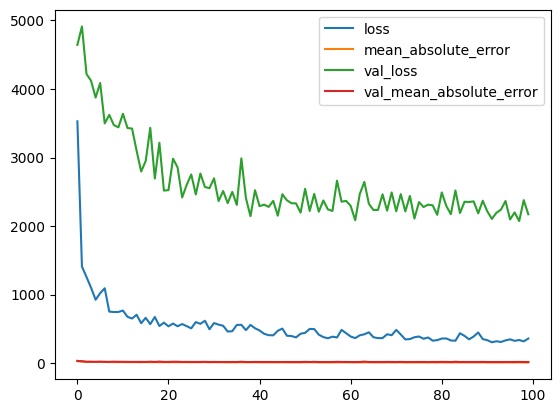

In [109]:
pd.DataFrame(history.history).plot()

In [110]:
Model.evaluate(data_pipeline.transform(x_test) , y_test)

60/60 [==============================] - 0s 987us/step - loss: 297.4177 - mean_absolute_error: 10.5639


[297.417724609375, 10.563878059387207]